1. Mount Google Drive

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


2. Import Library

In [ ]:
import os
from pathlib import Path
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from sklearn.model_selection import train_test_split
from tqdm import tqdm
import random
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import seaborn as sns
import matplotlib.pyplot as plt
import tensorflow as tf

3. Path Dataset

In [ ]:
diabetic_retinopathy = Path('/content/drive/MyDrive/Dataset Machine Learning/diabetic_retinopathy')
glaucoma = Path('/content/drive/MyDrive/Dataset Machine Learning/glaucoma')
cataract = Path('/content/drive/MyDrive/Dataset Machine Learning/cataract')
normal = Path('/content/drive/MyDrive/Dataset Machine Learning/normal')

In [ ]:
for p in [diabetic_retinopathy, glaucoma, cataract, normal]:
    jpg_count = len(list(p.glob('*.jpg')))
    jpeg_count = len(list(p.glob('*.jpeg')))
    png_count = len(list(p.glob('*.png')))
    total = jpg_count + jpeg_count + png_count
    print(f"{p.name}: {total} images (jpg={jpg_count}, jpeg={jpeg_count}, png={png_count})")

diabetic_retinopathy: 1098 images (jpg=0, jpeg=1098, png=0)
glaucoma: 1007 images (jpg=906, jpeg=0, png=101)
cataract: 1038 images (jpg=938, jpeg=0, png=100)
normal: 1074 images (jpg=1074, jpeg=0, png=0)


In [ ]:
disease_type = [diabetic_retinopathy, glaucoma, cataract, normal]
df = pd.DataFrame(columns=['image', 'disease_type'])

# Gunakan tqdm agar ada progress bar
for types in disease_type:
    # Ambil semua file .jpg, .jpeg, dan .png
    image_files = list(types.glob('*.jpg')) + list(types.glob('*.jpeg')) + list(types.glob('*.png'))
    for imagepath in tqdm(image_files, desc=f"Loading {types.name}"):
        df = pd.concat([
            df,
            pd.DataFrame({
                'image': [str(imagepath)],
                'disease_type': [types.name]
            })
        ], ignore_index=True)


Loading normal: 100%|██████████| 1074/1074 [00:00<00:00, 1944.95it/s]


In [ ]:
# display the dataframe
df

,image,disease_type
0,/content/drive/MyDrive/Dataset Machine Learnin...,diabetic_retinopathy
1,/content/drive/MyDrive/Dataset Machine Learnin...,diabetic_retinopathy
2,/content/drive/MyDrive/Dataset Machine Learnin...,diabetic_retinopathy
3,/content/drive/MyDrive/Dataset Machine Learnin...,diabetic_retinopathy
4,/content/drive/MyDrive/Dataset Machine Learnin...,diabetic_retinopathy
...,...,...
4212,/content/drive/MyDrive/Dataset Machine Learnin...,normal
4213,/content/drive/MyDrive/Dataset Machine Learnin...,normal
4214,/content/drive/MyDrive/Dataset Machine Learnin...,normal
4215,/content/drive/MyDrive/Dataset Machine Learnin...,normal


In [ ]:
# check the count of the target label
df.disease_type.value_counts()

,count
disease_type,
diabetic_retinopathy,1098
normal,1074
cataract,1038
glaucoma,1007


### Visualizing Images in the dataset

In [ ]:
def plot_image(label_name, num_samples=3):
    """
    Menampilkan beberapa contoh gambar dari kelas penyakit mata tertentu.
    Args:
        label_name (str): nama kelas, misalnya 'glaucoma', 'cataract', 'normal', atau 'diabetic_retinopathy'
        num_samples (int): jumlah gambar yang ingin ditampilkan
    """
    # Pastikan label valid
    valid_labels = ['diabetic_retinopathy', 'glaucoma', 'cataract', 'normal']
    if label_name not in valid_labels:
        print(f"Label tidak valid! Pilih salah satu dari: {valid_labels}")
        return

    # Ambil sample gambar dari DataFrame
    sample_images = df[df['disease_type'] == label_name].sample(num_samples)['image']

    # Plot gambar
    plt.figure(figsize=(12, 6))
    for i, path in enumerate(sample_images, 1):
        img = mpimg.imread(path)
        plt.subplot(1, num_samples, i)
        plt.imshow(img)
        plt.axis('off')
        plt.title(label_name.replace("_", " ").title())

    plt.suptitle(f"Contoh Gambar: {label_name.replace('_', ' ').title()}", fontsize=16)
    plt.show()

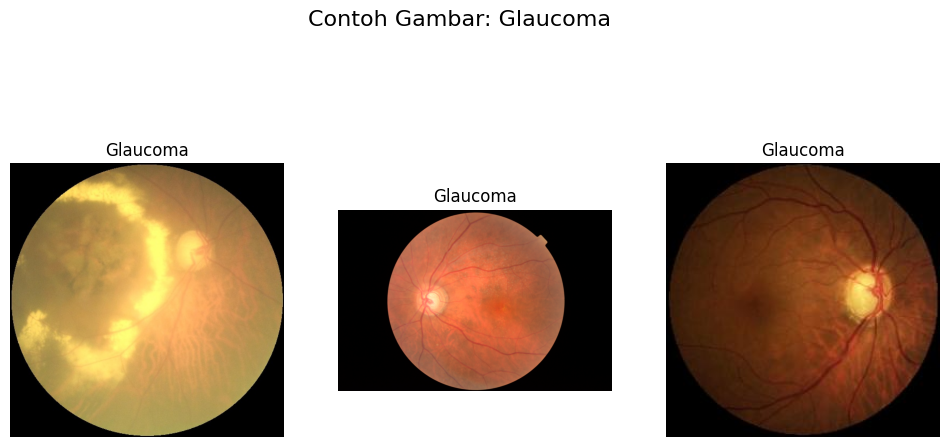

In [ ]:
# Menampilkan 3 contoh gambar dari setiap kelas
plot_image('glaucoma', num_samples=3)

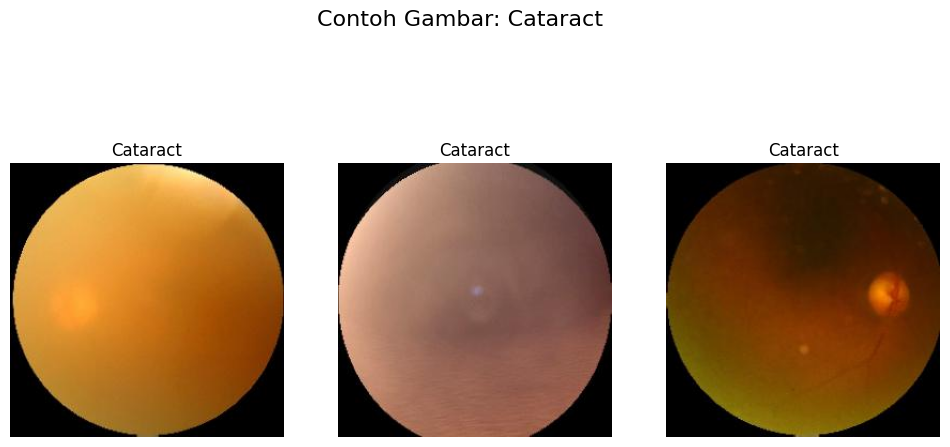

In [ ]:
plot_image('cataract', num_samples=3)

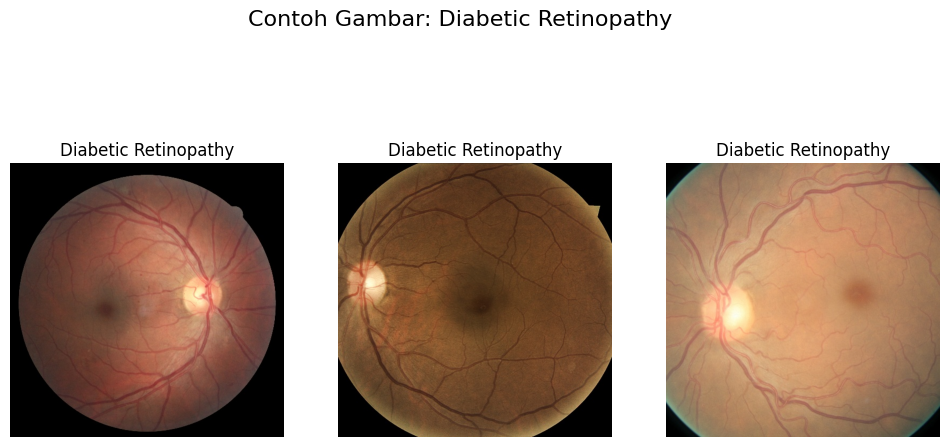

In [ ]:
plot_image('diabetic_retinopathy', num_samples=3)

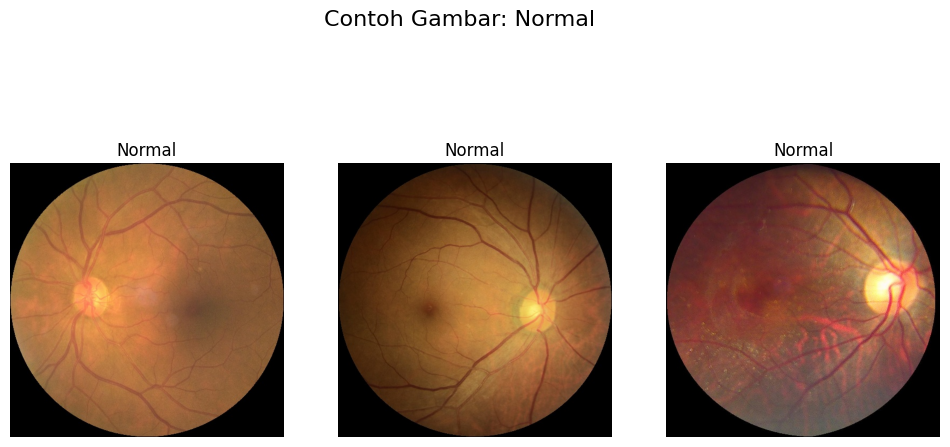

In [ ]:
plot_image('normal', num_samples=3)

In [ ]:
label_map = {'normal': 0,
             'cataract': 1,
             'glaucoma': 2,
             'diabetic_retinopathy': 3}

# buat kolom baru berisi label numerik
df['label'] = df['disease_type'].map(label_map)

# cek hasil mapping
df

,image,disease_type,label
0,/content/drive/MyDrive/Dataset Machine Learnin...,diabetic_retinopathy,3
1,/content/drive/MyDrive/Dataset Machine Learnin...,diabetic_retinopathy,3
2,/content/drive/MyDrive/Dataset Machine Learnin...,diabetic_retinopathy,3
3,/content/drive/MyDrive/Dataset Machine Learnin...,diabetic_retinopathy,3
4,/content/drive/MyDrive/Dataset Machine Learnin...,diabetic_retinopathy,3
...,...,...,...
4212,/content/drive/MyDrive/Dataset Machine Learnin...,normal,0
4213,/content/drive/MyDrive/Dataset Machine Learnin...,normal,0
4214,/content/drive/MyDrive/Dataset Machine Learnin...,normal,0
4215,/content/drive/MyDrive/Dataset Machine Learnin...,normal,0


In [ ]:
# check the lebel count to verify it has been mapped
df.disease_type.value_counts()

,count
disease_type,
diabetic_retinopathy,1098
normal,1074
cataract,1038
glaucoma,1007


In [ ]:
# randomising the dataset
df1 = df.sample(frac=1).reset_index(drop=True)

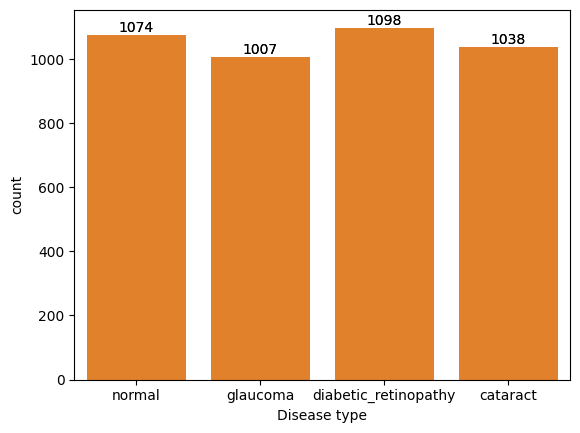

In [ ]:
# create a countplot of the disease type
sns.countplot(x = 'disease_type', data = df1)
plt.xlabel("Disease type")
ax = sns.countplot(x='disease_type', data=df1)
for container in ax.containers:
    ax.bar_label(container)
plt.show()

In [ ]:
#import necessary libraries for the model
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Model
from tensorflow.keras.applications.resnet50 import preprocess_input
from tensorflow import keras
from tensorflow.keras import layers
from sklearn.metrics import classification_report, confusion_matrix

### Model Training

In [ ]:
from sklearn.model_selection import train_test_split

train_df, remaining_df = train_test_split(df1, test_size=0.3, random_state=42)
valid_df, test_df = train_test_split(remaining_df, test_size=0.5, random_state=42)

In [ ]:
# augumentation of images
datagen = ImageDataGenerator(preprocessing_function=preprocess_input,validation_split=0.2)


In [ ]:
# create the train data
train_data = datagen.flow_from_dataframe(dataframe=df1,
                                          x_col ='image',
                                          y_col = 'disease_type',
                                          target_size=(150,150),
                                          class_mode = 'categorical',
                                          batch_size = 32,
                                          shuffle = True,
                                          subset = 'training')

Found 3374 validated image filenames belonging to 4 classes.


In [ ]:
test_data = datagen.flow_from_dataframe(dataframe=test_df,
                                        x_col='image',
                                        y_col='disease_type',
                                        target_size=(224, 224),
                                        class_mode='categorical',
                                        batch_size=32,
                                        shuffle=False,
                                        subset='validation' )

Found 126 validated image filenames belonging to 4 classes.


In [ ]:
# create the validation data
valid_data = datagen.flow_from_dataframe(dataframe=df1,
                                          x_col ='image',
                                          y_col = 'disease_type',
                                          target_size=(150,150),
                                          class_mode = 'categorical',
                                          batch_size = 32,
                                          shuffle = False,
                                          subset = 'validation')

Found 843 validated image filenames belonging to 4 classes.


Membuat Model InceptionResNetV2

In [ ]:
from tensorflow.keras.applications import InceptionResNetV2

base_model = InceptionResNetV2(input_shape=(150,150,3),include_top=False,weights="imagenet", classes=4)

219055592/219055592 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


In [ ]:
from tensorflow.keras import layers, models

labels=[key for key in train_data.class_indices]
num_classes = len(disease_type)

model = models.Sequential([
    base_model,
    layers.GlobalAveragePooling2D(),
    layers.Dense(128, activation='relu'),
    layers.Dense(num_classes, activation='softmax')
])


In [ ]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.categorical_crossentropy,
              metrics=['accuracy'])


In [ ]:
# fitting the model
his = model.fit(
  train_data,
    validation_data=valid_data,
  epochs=10
)

/usr/local/lib/python3.12/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/10
106/106 ━━━━━━━━━━━━━━━━━━━━ 1952s 17s/step - accuracy: 0.7297 - loss: 0.7017 - val_accuracy: 0.6074 - val_loss: 4.4761
Epoch 2/10
106/106 ━━━━━━━━━━━━━━━━━━━━ 1698s 16s/step - accuracy: 0.9050 - loss: 0.2818 - val_accuracy: 0.7900 - val_loss: 0.8102
Epoch 3/10
106/106 ━━━━━━━━━━━━━━━━━━━━ 1518s 14s/step - accuracy: 0.9285 - loss: 0.2001 - val_accuracy: 0.8956 - val_loss: 0.3299
Epoch 4/10
106/106 ━━━━━━━━━━━━━━━━━━━━ 1637s 15s/step - accuracy: 0.9468 - loss: 0.1591 - val_accuracy: 0.7699 - val_loss: 0.9734
Epoch 5/10
106/106 ━━━━━━━━━━━━━━━━━━━━ 1517s 14s/step - accuracy: 0.9582 - loss: 0.1225 - val_accuracy: 0.9015 - val_loss: 0.3363
Epoch 6/10
106/106 ━━━━━━━━━━━━━━━━━━━━ 1504s 14s/step - accuracy: 0.9731 - loss: 0.0803 - val_accuracy: 0.7367 - val_loss: 1.7008
Epoch 7/10
106/106 ━━━━━━━━━━━━━━━━━━━━ 1515s 14s/step - accuracy: 0.9649 - loss: 0.0975 - val_accuracy: 0.8671 - val_loss: 0.4626
Epoch 8/10
106/106 ━━━━━━━━━━━━━━━━━━━━ 1591s 15s/step - accuracy: 0.9806 - loss: 0

### Visualizing Model Performance

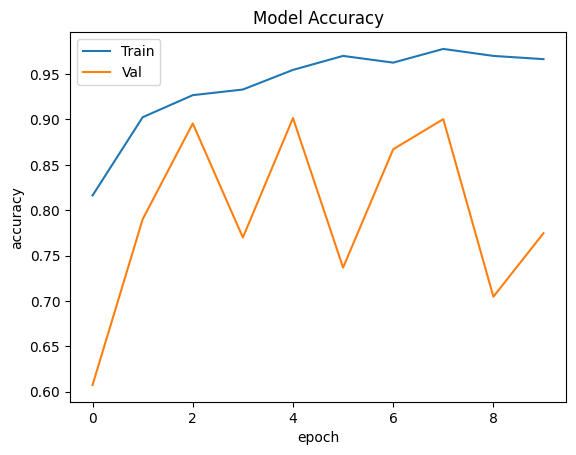

In [ ]:
# create a plot of accuracy and val_acuracy for each epoch
plt.plot(his.history['accuracy'])
plt.plot(his.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['Train', 'Val'])
plt.show()

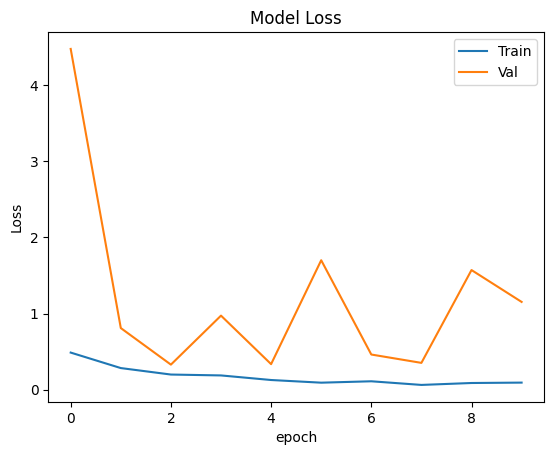

In [ ]:
# create a plot of loss and val_loss for each epoch
plt.plot(his.history['loss'])
plt.plot(his.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('epoch')
plt.legend(['Train', 'Val'])
plt.show()

### Model Evaluation

In [ ]:
model.evaluate(valid_data)

27/27 ━━━━━━━━━━━━━━━━━━━━ 87s 3s/step - accuracy: 0.7834 - loss: 1.1117


[1.15347158908844, 0.7746144533157349]

In [ ]:
model.evaluate(train_data)

106/106 ━━━━━━━━━━━━━━━━━━━━ 348s 3s/step - accuracy: 0.8215 - loss: 0.6661


[0.6871277093887329, 0.815056324005127]

In [ ]:
# evaluate the model
y_test = valid_data.classes
y_pred = model.predict(valid_data)
y_pred = np.argmax(y_pred,axis=1)

27/27 ━━━━━━━━━━━━━━━━━━━━ 118s 4s/step


In [ ]:
# generate classification report of the model
print(classification_report(y_test,y_pred,target_names = labels))

                      precision    recall  f1-score   support

            cataract       0.93      0.87      0.90       192
diabetic_retinopathy       0.84      0.99      0.91       255
            glaucoma       0.59      0.94      0.73       195
              normal       0.98      0.24      0.39       201

            accuracy                           0.77       843
           macro avg       0.83      0.76      0.73       843
        weighted avg       0.84      0.77      0.74       843



In [ ]:
model.save("my_new_model.h5")

Pendekatan Fitur Klasik GLCM

✅ Total data: 4217 citra
Fitting 3 folds for each of 9 candidates, totalling 27 fits
Best Params: {'C': 10, 'gamma': 1, 'kernel': 'rbf'}

🎯 Akurasi Klasifikasi (GLCM + SVM): 77.73%

                      precision    recall  f1-score   support

            cataract       0.81      0.83      0.82       208
diabetic_retinopathy       0.91      0.87      0.89       220
            glaucoma       0.70      0.60      0.65       201
              normal       0.69      0.80      0.74       215

            accuracy                           0.78       844
           macro avg       0.78      0.77      0.77       844
        weighted avg       0.78      0.78      0.78       844



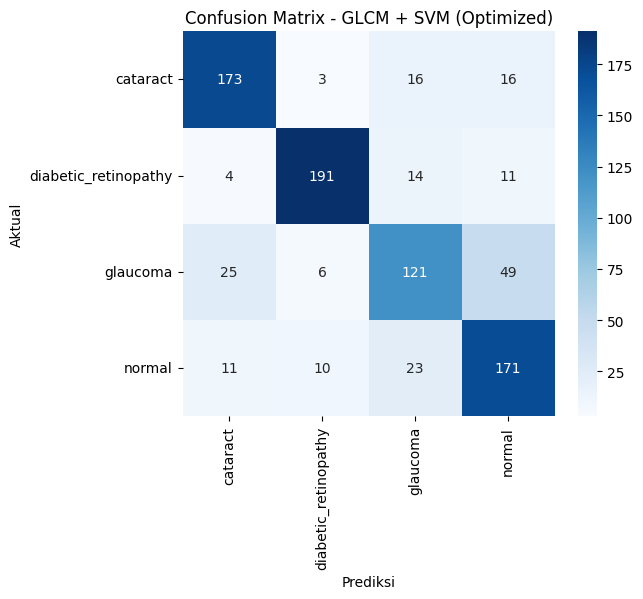

In [ ]:
from pathlib import Path
import cv2, os
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from skimage.feature import graycomatrix, graycoprops
import matplotlib.pyplot as plt
import seaborn as sns

# Path dataset
dataset_base = Path('/content/drive/MyDrive/Dataset Machine Learning')
categories = ['cataract', 'diabetic_retinopathy', 'glaucoma', 'normal']

# Ekstraksi fitur GLCM (multi-angle)
def extract_glcm_features(image):
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    gray = cv2.resize(gray, (128, 128))
    glcm = graycomatrix(gray, distances=[1, 3, 5],
                        angles=[0, np.pi/4, np.pi/2, 3*np.pi/4],
                        symmetric=True, normed=True)
    feats = [
        graycoprops(glcm, 'contrast').mean(),
        graycoprops(glcm, 'dissimilarity').mean(),
        graycoprops(glcm, 'homogeneity').mean(),
        graycoprops(glcm, 'energy').mean(),
        graycoprops(glcm, 'correlation').mean(),
        graycoprops(glcm, 'ASM').mean()
    ]
    return feats

# Load semua gambar
X, y = [], []
for label in categories:
    folder = dataset_base / label
    for file in os.listdir(folder):
        img_path = folder / file
        img = cv2.imread(str(img_path))
        if img is None:
            continue
        X.append(extract_glcm_features(img))
        y.append(label)

X = np.array(X)
y = np.array(y)
print(f"✅ Total data: {len(X)} citra")

# Normalisasi
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split data
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, stratify=y, random_state=42)

# Optimasi SVM
param_grid = {
    'C': [0.1, 1, 10],
    'gamma': [0.01, 0.1, 1],
    'kernel': ['rbf']
}
grid = GridSearchCV(SVC(), param_grid, refit=True, verbose=1, cv=3)
grid.fit(X_train, y_train)

print(f"Best Params: {grid.best_params_}")

# Evaluasi
best_model = grid.best_estimator_
y_pred = best_model.predict(X_test)

acc = accuracy_score(y_test, y_pred)
print(f"\n🎯 Akurasi Klasifikasi (GLCM + SVM): {acc*100:.2f}%\n")
print(classification_report(y_test, y_pred, target_names=categories))

# Confusion matrix
cm = confusion_matrix(y_test, y_pred, labels=categories)
plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=categories, yticklabels=categories)
plt.xlabel("Prediksi")
plt.ylabel("Aktual")
plt.title("Confusion Matrix - GLCM + SVM (Optimized)")
plt.show()


Pendekatan Fitur Klasik: LBP + SVM

✅ Total data berhasil diekstraksi: 4217 citra

🎯 Akurasi Klasifikasi (LBP + SVM): 80.45%

📊 Laporan Klasifikasi:
                      precision    recall  f1-score   support

            cataract       0.79      0.85      0.82       208
diabetic_retinopathy       0.97      0.88      0.92       220
            glaucoma       0.74      0.62      0.67       201
              normal       0.73      0.86      0.79       215

            accuracy                           0.80       844
           macro avg       0.81      0.80      0.80       844
        weighted avg       0.81      0.80      0.80       844



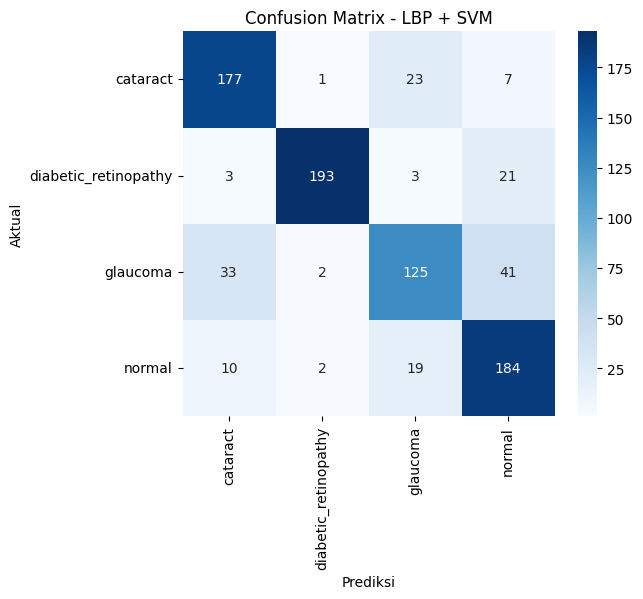

In [ ]:

from pathlib import Path
import cv2
import numpy as np
import os
from skimage.feature import local_binary_pattern
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# ---- Path ke dataset ----
dataset_base = Path('/content/drive/MyDrive/Dataset Machine Learning')
categories = ['cataract', 'diabetic_retinopathy', 'glaucoma', 'normal']

# ---- Parameter LBP ----
radius = 3            # radius tetangga
n_points = 8 * radius  # jumlah titik di sekitar piksel
method = 'uniform'    # metode LBP (uniform paling umum)

# ---- Fungsi ekstraksi fitur LBP ----
def extract_lbp_features(image):
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    gray = cv2.resize(gray, (128, 128))
    lbp = local_binary_pattern(gray, n_points, radius, method)
    (hist, _) = np.histogram(lbp.ravel(),
                             bins=np.arange(0, n_points + 3),
                             range=(0, n_points + 2))
    # Normalisasi histogram
    hist = hist.astype("float")
    hist /= (hist.sum() + 1e-6)
    return hist

# ---- Ekstraksi fitur dari seluruh gambar ----
X = []
y = []

for label in categories:
    folder = dataset_base / label
    if not folder.exists():
        print(f"⚠️ Folder tidak ditemukan: {folder}")
        continue

    for file in os.listdir(folder):
        img_path = folder / file
        img = cv2.imread(str(img_path))
        if img is None:
            continue

        features = extract_lbp_features(img)
        X.append(features)
        y.append(label)

X = np.array(X)
y = np.array(y)
print(f"✅ Total data berhasil diekstraksi: {len(X)} citra")

# ---- Normalisasi fitur ----
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# ---- Split data menjadi train/test ----
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, stratify=y, random_state=42
)

# ---- Latih model SVM ----
svm = SVC(kernel='rbf', C=10, gamma=0.1)
svm.fit(X_train, y_train)
y_pred = svm.predict(X_test)

# ---- Evaluasi hasil ----
acc = accuracy_score(y_test, y_pred)
print(f"\n🎯 Akurasi Klasifikasi (LBP + SVM): {acc*100:.2f}%\n")
print("📊 Laporan Klasifikasi:")
print(classification_report(y_test, y_pred, target_names=categories))

# ---- Confusion Matrix ----
cm = confusion_matrix(y_test, y_pred, labels=categories)
plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=categories, yticklabels=categories)
plt.xlabel("Prediksi")
plt.ylabel("Aktual")
plt.title("Confusion Matrix - LBP + SVM")
plt.show()


Pendekatan Deep Learning: CNN

Found 3376 images belonging to 4 classes.
Found 841 images belonging to 4 classes.


/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/usr/local/lib/python3.12/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/30
106/106 ━━━━━━━━━━━━━━━━━━━━ 1026s 10s/step - accuracy: 0.4130 - loss: 1.3059 - val_accuracy: 0.2604 - val_loss: 1.4126 - learning_rate: 1.0000e-04
Epoch 2/30
106/106 ━━━━━━━━━━━━━━━━━━━━ 1014s 10s/step - accuracy: 0.5797 - loss: 1.0123 - val_accuracy: 0.2461 - val_loss: 1.6517 - learning_rate: 1.0000e-04
Epoch 3/30
106/106 ━━━━━━━━━━━━━━━━━━━━ 0s 9s/step - accuracy: 0.6440 - loss: 0.8772
Epoch 3: ReduceLROnPlateau reducing learning rate to 2.9999999242136255e-05.
106/106 ━━━━━━━━━━━━━━━━━━━━ 1022s 10s/step - accuracy: 0.6441 - loss: 0.8768 - val_accuracy: 0.2449 - val_loss: 2.4618 - learning_rate: 1.0000e-04
Epoch 4/30
106/106 ━━━━━━━━━━━━━━━━━━━━ 1028s 10s/step - accuracy: 0.6888 - loss: 0.7651 - val_accuracy: 0.2687 - val_loss: 2.0694 - learning_rate: 3.0000e-05
Epoch 5/30
106/106 ━━━━━━━━━━━━━━━━━━━━ 1082s 10s/step - accuracy: 0.7054 - loss: 0.7332 - val_accuracy: 0.4423 - val_loss: 1.2975 - learning_rate: 3.0000e-05
Epoch 6/30
106/106 ━━━━━━━━━━━━━━━━━━━━ 1007s 10s/step

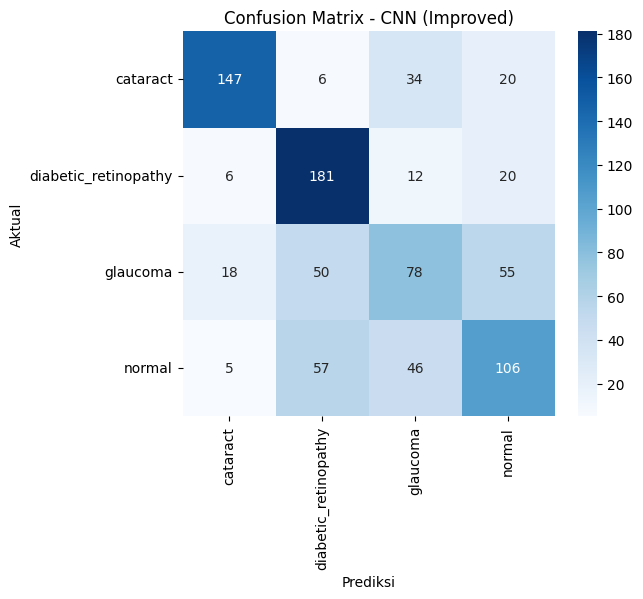

In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization, GlobalAveragePooling2D
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import os

# ---- Path dataset ----
base_dir = '/content/drive/MyDrive/Dataset Machine Learning'

# ---- Augmentasi lebih kuat untuk meningkatkan generalisasi ----
datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2,
    rotation_range=25,
    zoom_range=0.2,
    width_shift_range=0.1,
    height_shift_range=0.1,
    shear_range=0.1,
    horizontal_flip=True,
)

# ---- Data training ----
train_data = datagen.flow_from_directory(
    base_dir,
    target_size=(150, 150),
    batch_size=32,
    class_mode='categorical',
    subset='training',
    seed=42,
    shuffle=True
)

# ---- Data validasi ----
valid_data = datagen.flow_from_directory(
    base_dir,
    target_size=(150, 150),
    batch_size=32,
    class_mode='categorical',
    subset='validation',
    seed=42,
    shuffle=False
)

# ---- Model CNN (lebih dalam dan stabil) ----
model = Sequential([
    # Block 1
    Conv2D(32, (3,3), padding='same', activation='relu', input_shape=(150,150,3)),
    BatchNormalization(),
    Conv2D(32, (3,3), padding='same', activation='relu'),
    BatchNormalization(),
    MaxPooling2D(),

    # Block 2
    Conv2D(64, (3,3), padding='same', activation='relu'),
    BatchNormalization(),
    Conv2D(64, (3,3), padding='same', activation='relu'),
    BatchNormalization(),
    MaxPooling2D(),

    # Block 3
    Conv2D(128, (3,3), padding='same', activation='relu'),
    BatchNormalization(),
    Conv2D(128, (3,3), padding='same', activation='relu'),
    BatchNormalization(),
    MaxPooling2D(),

    # GAP lebih stabil daripada Flatten
    GlobalAveragePooling2D(),

    Dense(256, activation='relu'),
    Dropout(0.5),

    Dense(4, activation='softmax')
])

# ---- Kompilasi model ----
model.compile(
    optimizer=Adam(learning_rate=1e-4),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

# ---- Callback anti overfitting ----
callbacks = [
    EarlyStopping(patience=5, restore_best_weights=True),
    ReduceLROnPlateau(patience=2, factor=0.3, verbose=1)
]

# ---- Training ----
history = model.fit(
    train_data,
    validation_data=valid_data,
    epochs=30,
    callbacks=callbacks
)

# ---- Evaluasi ----
loss, acc = model.evaluate(valid_data)
print(f"\n🎯 Akurasi Validasi: {acc*100:.2f}%")

# ---- Prediksi ----
y_pred = model.predict(valid_data)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true = valid_data.classes
labels = list(valid_data.class_indices.keys())

# ---- Laporan klasifikasi ----
print("\n📊 Laporan Klasifikasi:")
print(classification_report(y_true, y_pred_classes, target_names=labels))

# ---- Confusion Matrix ----
cm = confusion_matrix(y_true, y_pred_classes)
plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=labels, yticklabels=labels)
plt.xlabel("Prediksi")
plt.ylabel("Aktual")
plt.title("Confusion Matrix - CNN (Improved)")
plt.show()


Deep Learning MobileNetV3

Downloading: "https://download.pytorch.org/models/mobilenet_v3_large-5c1a4163.pth" to /root/.cache/torch/hub/checkpoints/mobilenet_v3_large-5c1a4163.pth


100%|██████████| 21.1M/21.1M [00:00<00:00, 60.9MB/s]
Epoch 1/15: 100%|██████████| 211/211 [12:20<00:00,  3.51s/it, loss=0.549]


Epoch 1 -> val_loss=0.3793 | val_acc=0.8768
💾 Saved best model to /content/best_mobilenetv3.pth


Epoch 2/15: 100%|██████████| 211/211 [11:07<00:00,  3.16s/it, loss=0.246]


Epoch 2 -> val_loss=0.1830 | val_acc=0.9289
💾 Saved best model to /content/best_mobilenetv3.pth


Epoch 3/15: 100%|██████████| 211/211 [11:11<00:00,  3.18s/it, loss=0.189]


Epoch 3 -> val_loss=0.5314 | val_acc=0.7962
No improvement (1/4)


Epoch 4/15: 100%|██████████| 211/211 [11:28<00:00,  3.26s/it, loss=0.165]


Epoch 4 -> val_loss=0.1764 | val_acc=0.9360
💾 Saved best model to /content/best_mobilenetv3.pth


Epoch 5/15: 100%|██████████| 211/211 [11:18<00:00,  3.22s/it, loss=0.124]


Epoch 5 -> val_loss=0.1983 | val_acc=0.9242
No improvement (1/4)


Epoch 6/15: 100%|██████████| 211/211 [11:35<00:00,  3.30s/it, loss=0.104]


Epoch 6 -> val_loss=0.2058 | val_acc=0.9396
No improvement (2/4)


Epoch 7/15: 100%|██████████| 211/211 [11:23<00:00,  3.24s/it, loss=0.085]


Epoch 7 -> val_loss=0.1834 | val_acc=0.9372
No improvement (3/4)


Epoch 8/15: 100%|██████████| 211/211 [11:07<00:00,  3.16s/it, loss=0.0744]


Epoch 8 -> val_loss=0.2137 | val_acc=0.9313
No improvement (4/4)
⛔ Early stopping

Final Accuracy: 0.9360189573459715

Classification Report:

                      precision    recall  f1-score   support

            cataract       0.94      0.97      0.95       208
diabetic_retinopathy       0.99      1.00      1.00       220
            glaucoma       0.94      0.85      0.90       201
              normal       0.88      0.92      0.90       215

            accuracy                           0.94       844
           macro avg       0.94      0.93      0.93       844
        weighted avg       0.94      0.94      0.94       844



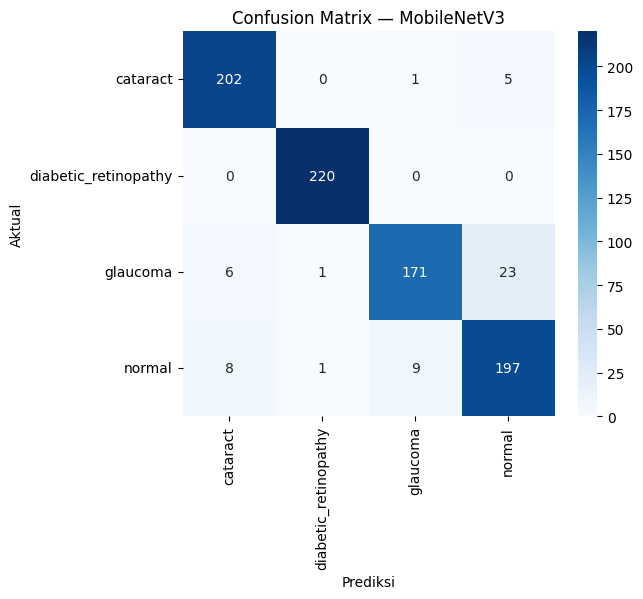

In [ ]:
!pip install -q torch torchvision opencv-python scikit-learn matplotlib seaborn

from pathlib import Path
import os, cv2
import numpy as np
import torch
import torch.nn as nn
from torch.utils.data import Dataset, DataLoader
import torchvision.transforms as T
from torchvision.models import mobilenet_v3_large, MobileNet_V3_Large_Weights

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

import matplotlib.pyplot as plt
import seaborn as sns
from tqdm import tqdm

# ===========================
# 1) CONFIG
# ===========================
DATASET_BASE = Path('/content/drive/MyDrive/Dataset Machine Learning')
CATEGORIES = ['cataract', 'diabetic_retinopathy', 'glaucoma', 'normal']
LABEL_MAP = {c: i for i, c in enumerate(CATEGORIES)}
NUM_LABELS = len(CATEGORIES)

BATCH_SIZE = 16
EPOCHS = 15
LR = 1e-4
PATIENCE = 4
SAVE_PATH = "/content/best_mobilenetv3.pth"
SEED = 42

torch.manual_seed(SEED)
np.random.seed(SEED)

# ===========================
# 2) TRANSFORM + DATASET
# ===========================
transform = T.Compose([
    T.ToPILImage(),
    T.Resize((224, 224)),
    T.RandomHorizontalFlip(),
    T.RandomRotation(10),
    T.ToTensor(),
    T.Normalize(mean=[0.485, 0.456, 0.406],
                std=[0.229, 0.224, 0.225])
])

class RetinaDataset(Dataset):
    def __init__(self, image_paths, labels, transform):
        self.image_paths = image_paths
        self.labels = labels
        self.transform = transform

    def __len__(self):
        return len(self.image_paths)

    def __getitem__(self, idx):
        p = str(self.image_paths[idx])
        img = cv2.imread(p)
        if img is None:
            img = np.zeros((224,224,3), dtype=np.uint8)
        else:
            img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

        img = self.transform(img)
        return img, torch.tensor(self.labels[idx], dtype=torch.long)

# ===========================
# 3) LOAD DATA
# ===========================
image_paths, labels = [], []

for cls in CATEGORIES:
    folder = DATASET_BASE / cls
    for fname in os.listdir(folder):
        if fname.lower().endswith((".jpg",".jpeg",".png")):
            image_paths.append(folder / fname)
            labels.append(LABEL_MAP[cls])

train_paths, test_paths, train_lbl, test_lbl = train_test_split(
    image_paths, labels, test_size=0.2, stratify=labels, random_state=SEED
)

train_ds = RetinaDataset(train_paths, train_lbl, transform)
test_ds  = RetinaDataset(test_paths, test_lbl, transform)

train_loader = DataLoader(train_ds, batch_size=BATCH_SIZE, shuffle=True)
test_loader  = DataLoader(test_ds, batch_size=BATCH_SIZE, shuffle=False)

# ===========================
# 4) MODEL — MobileNetV3 LARGE
# ===========================
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

model = mobilenet_v3_large(weights=MobileNet_V3_Large_Weights.IMAGENET1K_V2)
model.classifier[3] = nn.Linear(model.classifier[3].in_features, NUM_LABELS)
model = model.to(device)

criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=LR)

# ===========================
# 5) VALIDATION FUNCTION
# ===========================
def validate():
    model.eval()
    total_loss = 0
    preds, trues = [], []

    with torch.no_grad():
        for imgs, labels in test_loader:
            imgs, labels = imgs.to(device), labels.to(device)
            outputs = model(imgs)
            loss = criterion(outputs, labels)
            total_loss += loss.item()

            pred = outputs.argmax(1).cpu().numpy()
            preds.extend(pred)
            trues.extend(labels.cpu().numpy())

    return total_loss / len(test_loader), accuracy_score(trues, preds), trues, preds

# ===========================
# 6) TRAINING LOOP
# ===========================
best_loss = float('inf')
no_improve = 0

for epoch in range(1, EPOCHS+1):
    model.train()
    train_loss = 0

    pbar = tqdm(train_loader, desc=f"Epoch {epoch}/{EPOCHS}")
    for imgs, labels in pbar:
        imgs, labels = imgs.to(device), labels.to(device)
        optimizer.zero_grad()

        outputs = model(imgs)
        loss = criterion(outputs, labels)

        loss.backward()
        optimizer.step()

        train_loss += loss.item()
        pbar.set_postfix({"loss": train_loss / (pbar.n + 1)})

    val_loss, val_acc, _, _ = validate()
    print(f"Epoch {epoch} -> val_loss={val_loss:.4f} | val_acc={val_acc:.4f}")

    if val_loss < best_loss:
        best_loss = val_loss
        no_improve = 0
        torch.save(model.state_dict(), SAVE_PATH)
        print(f"💾 Saved best model to {SAVE_PATH}")
    else:
        no_improve += 1
        print(f"No improvement ({no_improve}/{PATIENCE})")

    if no_improve >= PATIENCE:
        print("⛔ Early stopping")
        break

# ===========================
# 7) FINAL EVALUATION
# ===========================
model.load_state_dict(torch.load(SAVE_PATH, map_location=device))
val_loss, val_acc, y_true, y_pred = validate()

print("\nFinal Accuracy:", val_acc)
print("\nClassification Report:\n")
print(classification_report(y_true, y_pred, target_names=CATEGORIES))

cm = confusion_matrix(y_true, y_pred)
plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=CATEGORIES, yticklabels=CATEGORIES)
plt.title("Confusion Matrix — MobileNetV3")
plt.xlabel("Prediksi")
plt.ylabel("Aktual")
plt.show()


Transfer Learning: ResNet50

Found 3376 images belonging to 4 classes.
Found 841 images belonging to 4 classes.
94765736/94765736 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


/usr/local/lib/python3.12/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/15
106/106 ━━━━━━━━━━━━━━━━━━━━ 0s 8s/step - accuracy: 0.3030 - loss: 1.7037

106/106 ━━━━━━━━━━━━━━━━━━━━ 1037s 10s/step - accuracy: 0.3033 - loss: 1.7026 - val_accuracy: 0.2438 - val_loss: 1.4791 - learning_rate: 1.0000e-04
Epoch 2/15
106/106 ━━━━━━━━━━━━━━━━━━━━ 0s 8s/step - accuracy: 0.3728 - loss: 1.4811

106/106 ━━━━━━━━━━━━━━━━━━━━ 1018s 10s/step - accuracy: 0.3728 - loss: 1.4810 - val_accuracy: 0.2449 - val_loss: 1.4431 - learning_rate: 1.0000e-04
Epoch 3/15
106/106 ━━━━━━━━━━━━━━━━━━━━ 0s 8s/step - accuracy: 0.4044 - loss: 1.4375

106/106 ━━━━━━━━━━━━━━━━━━━━ 1010s 10s/step - accuracy: 0.4045 - loss: 1.4372 - val_accuracy: 0.2782 - val_loss: 1.3973 - learning_rate: 1.0000e-04
Epoch 4/15
106/106 ━━━━━━━━━━━━━━━━━━━━ 0s 8s/step - accuracy: 0.4381 - loss: 1.3339

106/106 ━━━━━━━━━━━━━━━━━━━━ 1013s 10s/step - accuracy: 0.4380 - loss: 1.3339 - val_accuracy: 0.3627 - val_loss: 1.3164 - learning_rate: 1.0000e-04
Epoch 5/15
106/106 ━━━━━━━━━━━━━━━━━━━━ 0s 8s/step - accuracy: 0.4277 - loss: 1.3315

106/106 ━━━━━━━━━━━━━━━━━━━━ 1021s 10s/step - accuracy: 0.4277 - loss: 1.3315 - val_accuracy: 0.4316 - val_loss: 1.2597 - learning_rate: 1.0000e-04
Epoch 6/15
106/106 ━━━━━━━━━━━━━━━━━━━━ 0s 8s/step - accuracy: 0.4452 - loss: 1.3289

106/106 ━━━━━━━━━━━━━━━━━━━━ 1022s 10s/step - accuracy: 0.4452 - loss: 1.3287 - val_accuracy: 0.4495 - val_loss: 1.2004 - learning_rate: 1.0000e-04
Epoch 7/15
106/106 ━━━━━━━━━━━━━━━━━━━━ 993s 9s/step - accuracy: 0.4409 - loss: 1.2881 - val_accuracy: 0.4245 - val_loss: 1.2086 - learning_rate: 1.0000e-04
Epoch 8/15
106/106 ━━━━━━━━━━━━━━━━━━━━ 0s 7s/step - accuracy: 0.4741 - loss: 1.2701

106/106 ━━━━━━━━━━━━━━━━━━━━ 986s 9s/step - accuracy: 0.4740 - loss: 1.2700 - val_accuracy: 0.4304 - val_loss: 1.1827 - learning_rate: 1.0000e-04
Epoch 9/15
106/106 ━━━━━━━━━━━━━━━━━━━━ 992s 9s/step - accuracy: 0.4645 - loss: 1.2471 - val_accuracy: 0.4554 - val_loss: 1.1933 - learning_rate: 1.0000e-04
Epoch 10/15
106/106 ━━━━━━━━━━━━━━━━━━━━ 0s 7s/step - accuracy: 0.4850 - loss: 1.2065

106/106 ━━━━━━━━━━━━━━━━━━━━ 983s 9s/step - accuracy: 0.4848 - loss: 1.2066 - val_accuracy: 0.4625 - val_loss: 1.1558 - learning_rate: 1.0000e-04
Epoch 11/15
106/106 ━━━━━━━━━━━━━━━━━━━━ 988s 9s/step - accuracy: 0.4934 - loss: 1.1759 - val_accuracy: 0.4780 - val_loss: 1.1569 - learning_rate: 1.0000e-04
Epoch 12/15
106/106 ━━━━━━━━━━━━━━━━━━━━ 0s 7s/step - accuracy: 0.4948 - loss: 1.1502

106/106 ━━━━━━━━━━━━━━━━━━━━ 977s 9s/step - accuracy: 0.4948 - loss: 1.1503 - val_accuracy: 0.4721 - val_loss: 1.1492 - learning_rate: 1.0000e-04
Epoch 13/15
106/106 ━━━━━━━━━━━━━━━━━━━━ 0s 7s/step - accuracy: 0.5112 - loss: 1.1546

106/106 ━━━━━━━━━━━━━━━━━━━━ 985s 9s/step - accuracy: 0.5111 - loss: 1.1546 - val_accuracy: 0.4709 - val_loss: 1.1272 - learning_rate: 1.0000e-04
Epoch 14/15
106/106 ━━━━━━━━━━━━━━━━━━━━ 0s 7s/step - accuracy: 0.5197 - loss: 1.1290

106/106 ━━━━━━━━━━━━━━━━━━━━ 983s 9s/step - accuracy: 0.5196 - loss: 1.1291 - val_accuracy: 0.5042 - val_loss: 1.1100 - learning_rate: 1.0000e-04
Epoch 15/15
106/106 ━━━━━━━━━━━━━━━━━━━━ 989s 9s/step - accuracy: 0.5140 - loss: 1.1433 - val_accuracy: 0.5006 - val_loss: 1.1214 - learning_rate: 1.0000e-04
Epoch 1/10
106/106 ━━━━━━━━━━━━━━━━━━━━ 1688s 16s/step - accuracy: 0.3548 - loss: 1.4766 - val_accuracy: 0.2473 - val_loss: 1.7698 - learning_rate: 1.0000e-05
Epoch 2/10
106/106 ━━━━━━━━━━━━━━━━━━━━ 1656s 16s/step - accuracy: 0.3966 - loss: 1.3881 - val_accuracy: 0.2735 - val_loss: 1.6524 - learning_rate: 1.0000e-05
Epoch 3/10
106/106 ━━━━━━━━━━━━━━━━━━━━ 1658s 16s/step - accuracy: 0.4201 - loss: 1.3490 - val_accuracy: 0.3757 - val_loss: 1.4053 - learning_rate: 1.0000e-05
Epoch 4/10
106/106 ━━━━━━━━━━━━━━━━━━━━ 1666s 16s/step - accuracy: 0.4225 - loss: 1.3270 - val_accuracy: 0.3698 - val_loss: 1.3184 - learning_rate: 1.0000e-05
Epoch 5/10
106/106 ━━━━━━━━━━━━━━━━━━━━ 1683s 16s/step - acc

106/106 ━━━━━━━━━━━━━━━━━━━━ 1677s 16s/step - accuracy: 0.5111 - loss: 1.1329 - val_accuracy: 0.5375 - val_loss: 1.0852 - learning_rate: 3.0000e-06
27/27 ━━━━━━━━━━━━━━━━━━━━ 189s 7s/step - accuracy: 0.5277 - loss: 1.0734

🔥 AKURASI VALIDASI FINAL: 51.49%
27/27 ━━━━━━━━━━━━━━━━━━━━ 197s 7s/step


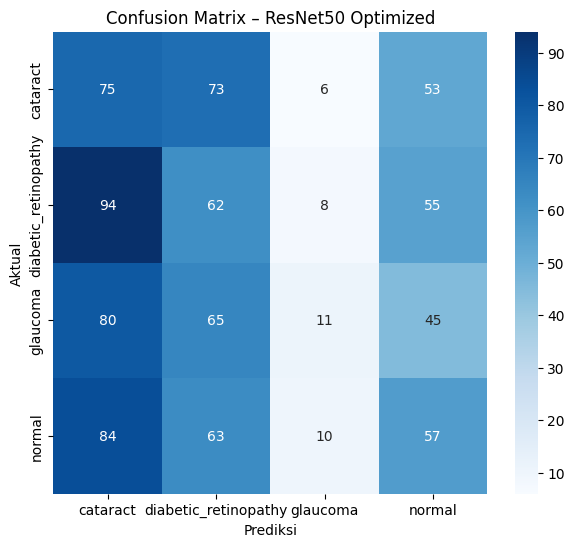


📊 Laporan Klasifikasi:
                      precision    recall  f1-score   support

            cataract       0.23      0.36      0.28       207
diabetic_retinopathy       0.24      0.28      0.26       219
            glaucoma       0.31      0.05      0.09       201
              normal       0.27      0.27      0.27       214

            accuracy                           0.24       841
           macro avg       0.26      0.24      0.22       841
        weighted avg       0.26      0.24      0.23       841



In [5]:
from pathlib import Path
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report, confusion_matrix
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense, Dropout, BatchNormalization
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau

# ============================
# PATH DATASET
# ============================
dataset_base = Path('/content/drive/MyDrive/Dataset Machine Learning')

# ============================
# DATA GENERATOR (Lebih Optimal)
# ============================
datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=25,
    zoom_range=0.25,
    width_shift_range=0.1,
    height_shift_range=0.1,
    shear_range=0.15,
    horizontal_flip=True,
    brightness_range=[0.8, 1.2],
    validation_split=0.2
)

train_data = datagen.flow_from_directory(
    dataset_base,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical',
    subset='training'
)

val_data = datagen.flow_from_directory(
    dataset_base,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical',
    subset='validation'
)

# ============================
# LOAD BASE MODEL
# ============================
base_model = ResNet50(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# FREEZE LAYER AWAL (transfer learning)
for layer in base_model.layers:
    layer.trainable = False

# ============================
# CLASSIFIER HEAD (lebih bagus)
# ============================
x = base_model.output
x = GlobalAveragePooling2D()(x)

x = BatchNormalization()(x)
x = Dense(256, activation='relu')(x)
x = Dropout(0.5)(x)

x = BatchNormalization()(x)
x = Dense(128, activation='relu')(x)
x = Dropout(0.3)(x)

predictions = Dense(train_data.num_classes, activation='softmax')(x)

model = Model(inputs=base_model.input, outputs=predictions)

# ============================
# COMPILE MODEL
# ============================
model.compile(
    optimizer=Adam(learning_rate=1e-4),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

# ============================
# CALLBACKS (Wajib untuk akurasi tinggi)
# ============================
callbacks = [
    EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True),
    ReduceLROnPlateau(monitor='val_loss', factor=0.3, patience=2, verbose=1),
    ModelCheckpoint("best_resnet50.h5", monitor='val_loss', save_best_only=True)
]

# ============================
# TRAINING 1 — Train classifier dulu
# ============================
history = model.fit(
    train_data,
    validation_data=val_data,
    epochs=15,
    callbacks=callbacks,
    verbose=1
)

# ============================
# FINE-TUNING (levels 100+ kebawah dibuka)
# ============================
for layer in base_model.layers[-60:]:
    layer.trainable = True

model.compile(
    optimizer=Adam(learning_rate=1e-5),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

history_ft = model.fit(
    train_data,
    validation_data=val_data,
    epochs=10,
    callbacks=callbacks,
    verbose=1
)

# ============================
# EVALUASI
# ============================
val_loss, val_acc = model.evaluate(val_data)
print(f"\n🔥 AKURASI VALIDASI FINAL: {val_acc*100:.2f}%")

# ============================
# CONFUSION MATRIX
# ============================
Y_pred = model.predict(val_data)
y_pred = np.argmax(Y_pred, axis=1)

cm = confusion_matrix(val_data.classes, y_pred)

plt.figure(figsize=(7,6))
sns.heatmap(
    cm,
    annot=True,
    fmt='d',
    cmap='Blues',
    xticklabels=val_data.class_indices.keys(),
    yticklabels=val_data.class_indices.keys()
)
plt.xlabel("Prediksi")
plt.ylabel("Aktual")
plt.title("Confusion Matrix – ResNet50 Optimized")
plt.show()

print("\n📊 Laporan Klasifikasi:")
print(classification_report(val_data.classes, y_pred, target_names=val_data.class_indices.keys()))


MobileNetV3 + LoRA

Found 3376 images belonging to 4 classes.
Found 841 images belonging to 4 classes.
12683000/12683000 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


/usr/local/lib/python3.12/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/12
106/106 ━━━━━━━━━━━━━━━━━━━━ 1014s 10s/step - accuracy: 0.2366 - loss: 1.6043 - val_accuracy: 0.3234 - val_loss: 1.3648
Epoch 2/12
106/106 ━━━━━━━━━━━━━━━━━━━━ 297s 3s/step - accuracy: 0.2577 - loss: 1.4535 - val_accuracy: 0.3187 - val_loss: 1.3443
Epoch 3/12
106/106 ━━━━━━━━━━━━━━━━━━━━ 295s 3s/step - accuracy: 0.2953 - loss: 1.3846 - val_accuracy: 0.2901 - val_loss: 1.3390
Epoch 4/12
106/106 ━━━━━━━━━━━━━━━━━━━━ 261s 2s/step - accuracy: 0.3261 - loss: 1.3579 - val_accuracy: 0.2901 - val_loss: 1.3370
Epoch 5/12
106/106 ━━━━━━━━━━━━━━━━━━━━ 273s 3s/step - accuracy: 0.3387 - loss: 1.3538 - val_accuracy: 0.4055 - val_loss: 1.3203
Epoch 6/12
106/106 ━━━━━━━━━━━━━━━━━━━━ 262s 2s/step - accuracy: 0.3365 - loss: 1.3425 - val_accuracy: 0.3639 - val_loss: 1.3160
Epoch 7/12
106/106 ━━━━━━━━━━━━━━━━━━━━ 269s 3s/step - accuracy: 0.3631 - loss: 1.3393 - val_accuracy: 0.3603 - val_loss: 1.3088
Epoch 8/12
106/106 ━━━━━━━━━━━━━━━━━━━━ 295s 3s/step - accuracy: 0.3706 - loss: 1.3242 - val_ac

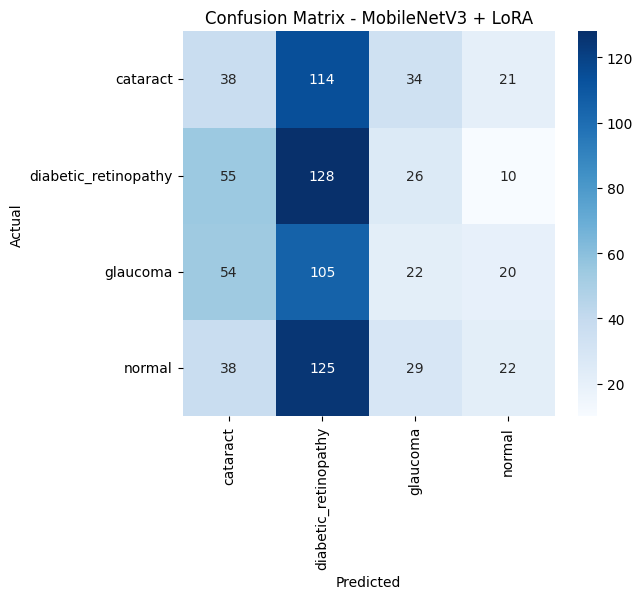


📊 Laporan Klasifikasi:
                      precision    recall  f1-score   support

            cataract       0.21      0.18      0.19       207
diabetic_retinopathy       0.27      0.58      0.37       219
            glaucoma       0.20      0.11      0.14       201
              normal       0.30      0.10      0.15       214

            accuracy                           0.25       841
           macro avg       0.24      0.25      0.21       841
        weighted avg       0.25      0.25      0.22       841

📁 Model disimpan sebagai: mobilenetv3_lora.h5


ValueError: The `save_format` argument is deprecated in Keras 3. Please remove this argument and pass a file path with either `.keras` or `.h5` extension.Received: save_format=tf

In [ ]:
# ================================================================
# 1. IMPORT
# ================================================================
from pathlib import Path
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report, confusion_matrix

import tensorflow as tf
from tensorflow.keras.layers import *
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.applications import MobileNetV3Large
from tensorflow.keras.preprocessing.image import ImageDataGenerator


# ================================================================
# 2. LAYER LoRA
# ================================================================
class LoRA(tf.keras.layers.Layer):
    def __init__(self, units, r=8, alpha=16, **kwargs):
        super().__init__(**kwargs)
        self.r = r
        self.alpha = alpha
        self.units = units
        self.scaling = alpha / r

    def build(self, input_shape):
        self.lora_A = self.add_weight(
            shape=(input_shape[-1], self.r),
            initializer="random_normal",
            trainable=True,
            name="lora_A"
        )
        self.lora_B = self.add_weight(
            shape=(self.r, self.units),
            initializer="zeros",
            trainable=True,
            name="lora_B"
        )

    def call(self, inputs):
        return tf.matmul(inputs, self.lora_A) @ self.lora_B * self.scaling


# Wrapper LoRA Dense
def lora_dense(x, units, r=8):
    base = Dense(units, use_bias=False)(x)
    lora = LoRA(units, r=r)(x)
    return base + lora


# ================================================================
# 3. DATASET LOADER
# ================================================================
dataset_base = Path('/content/drive/MyDrive/Dataset Machine Learning')

datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    zoom_range=0.2,
    horizontal_flip=True,
    validation_split=0.2
)

train_data = datagen.flow_from_directory(
    dataset_base,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical',
    subset='training'
)

val_data = datagen.flow_from_directory(
    dataset_base,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical',
    subset='validation'
)


# ================================================================
# 4. LOAD MobileNetV3 + FREEZE
# ================================================================
base_model = MobileNetV3Large(
    input_shape=(224, 224, 3),
    include_top=False,
    weights="imagenet"
)

for layer in base_model.layers:
    layer.trainable = False


# ================================================================
# 5. HEAD MODEL + LoRA
# ================================================================
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dropout(0.3)(x)

x = lora_dense(x, 128, r=8)
x = BatchNormalization()(x)
x = Activation("relu")(x)

outputs = Dense(train_data.num_classes, activation="softmax")(x)

model = Model(inputs=base_model.input, outputs=outputs)


# ================================================================
# 6. TRAINING
# ================================================================
model.compile(
    optimizer=Adam(learning_rate=1e-4),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

history = model.fit(
    train_data,
    validation_data=val_data,
    epochs=12,
    verbose=1
)


# ================================================================
# 7. EVALUASI
# ================================================================
val_loss, val_acc = model.evaluate(val_data)
print(f"\n🎯 Akurasi Validasi (MobileNetV3 + LoRA): {val_acc*100:.2f}%")


# ================================================================
# 8. CONFUSION MATRIX & CLASSIFICATION REPORT
# ================================================================
Y_pred = model.predict(val_data)
y_pred = np.argmax(Y_pred, axis=1)

cm = confusion_matrix(val_data.classes, y_pred)

plt.figure(figsize=(6, 5))
sns.heatmap(
    cm, annot=True, fmt='d', cmap='Blues',
    xticklabels=val_data.class_indices.keys(),
    yticklabels=val_data.class_indices.keys()
)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - MobileNetV3 + LoRA")
plt.show()

print("\n📊 Laporan Klasifikasi:")
print(classification_report(
    val_data.classes,
    y_pred,
    target_names=val_data.class_indices.keys()
))


# ================================================================
# 9. SAVE MODEL
# ================================================================
# Save H5
model.save("/content/mobilenetv3_lora.h5")
print("📁 Model disimpan sebagai: mobilenetv3_lora.h5")

# Save folder SavedModel
model.save("/content/mobilenetv3_lora_savedmodel", save_format="tf")
print("📁 Model disimpan sebagai folder: mobilenetv3_lora_savedmodel/")
